# Логическое (даталогическое) проектирование базы данных

1. Понятие нормализации, аномалии добавления, удаления, редактирования
2. Первая нормальная форма 1NF
3. Вторая нормальная форма 2NF
4. Третья нормальная форма 3NF
5. Четвертая 4NF, пятая 5NF нормальные формы
6. Пример даталогического проектирования

# Понятие нормализации, аномалии добавления, удаления, редактирования

После концептуального проектирования мы имеем набор сущностей, их атрибутов и некоторые весьма нечёткие представления о связях между сущностями. 

На этапе даталогического проектирования мы должны превратиь все сущности в соответствующие реляционные таблицы, продумать - какие атрибуты сущностей являются полями соответствующих таблиц, а какие внешними ключами других таблиц, определиться с типами хранимых данных в соответствующих полях, и самое главное, нужно разобраться, как правильно связать таблицы и в каких отношения (один ко многим, один к одному).

Здесь возникает важное понятие **нормализация**, которое направлено на устранение избыточности хранимой информации и обеспечение ее непротиворечивого хранения. Проведение этапа нормализации базы данных обеспечивает гибкость базы данных и позволяет без особых проблем изменять структуру базы данных в будущем при необходимости.

Если хранение данных реализовано некорректно, при обычных операциях добавления, удаления, редактирования данных могут случаться проблемы (аномалии). Рассмотрим пример ненормализованного хранения данных в Excel.

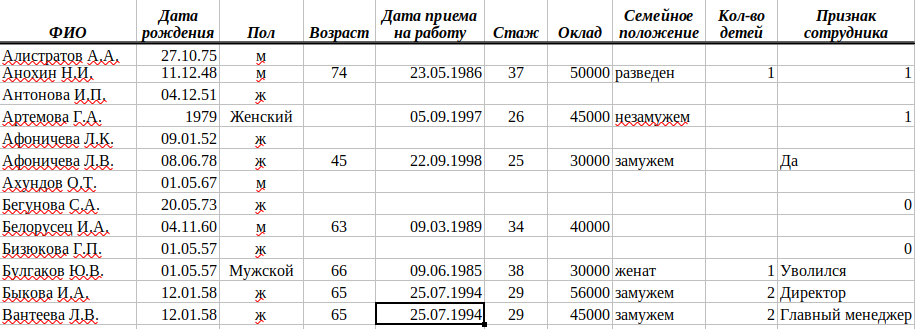


Перед нами список сотрудников и клиентов компании. При этом данную таблицу в разные времена заполняли разные сотрудники отдела кадров. Вначале было принято решение указывать, что данный человек является сотрудником, если в столбце "Признак сотрудника" стоит 1, если же там стоит 0 или пусто, то это клиент. В дальнейшем было принято решение вместо несодержательной единицы указывать должность. Если человек был сотрудником, но уволился, то в этом столбце запись меняется на "Уволился" или "Уволилась".

Очевидно, что при обработке таких данных возникают проблемы. Во-первых, ежегодно у сотрудников и клиентов меняется возраст и стаж, и нужно кропотливо вводить изменения, при этом у клиентов мы их стаж, как правило, не знаем. Здесь мы сталкиваемся с *аномалией редактирования*. Аналогичная аномалия возникает, если мы захотим разделить ФИО на фалимию, имя, отчество, что имеет значение для поиска клиентов и сотрудников по фамилии. 

Допустим, мы добавляем нового сотрудника, нужно принять решение, какой стратегией пользоваться при заполнении столбца "Признак сотрудника" - указывать там 1, или должность. Возникает *аномалия добавления*. 

А если сотрудник переназначен на другую должность, мы вынуждены что-то придумывать, чтобы сохранить историю его предыдущих назначений, иначе возникнет *аномалия удаления*.

Конечно, это лишь малая часть примеров, когда работа с данными, хранимыми в таком формате приводит к проблемам. Легко продемонстрировать и массу других проблем.

Все это приводит к выводу о необходимости нормализации.

**Нормализация – это процесс последовательного преобразования таблиц базы данных к
виду, принятому в реляционной модели данных**

Специалисты различают пять последовательных этапов (форм) приведения данных к реляционному виду от первой нормальной формы (First Normal Form, 1NF) до пятой (5NF). На каждой из ступеней нормализации таблица приобретает новые черты, которые потребуются для перехода к очередному этапу. Поэтому, чтобы прийти к
заключительной нормальной форме, надо на каждом из этапов шаг за шагом методично совершенствовать структуру таблиц. Перепрыгнуть хотя бы через одну из ступеней нормализации нельзя!

## Первая нормальная форма 1NF

Практически любой человек, делающий первые шаги на поприще проектирования БД, повторяет одну и ту же ошибку – собирает всю подлежащую хранению информацию в одну таблицу. Более того, очень часто допускается добавлять в одну ячейку таблицы повторяющиеся группы данных. В нашем примере, допустим человек работает на 0.5 ставки на одной должности, и на 0ю5 ставки на другой. Принимается решение указать должности в столбце признак сотрудника через запятую: "Менеджер, Начальник склада". С точки зрения теории реляционных баз данных, это ошибка. 

**С реляционными данными действует тот же самый закон: одна ячейка – одно значение.**

Безусловно, из правил бывают и исключения. Иногда по тем или иным причинам разработчикам БД приходится идти на «преступление» и закрыть глаза на запрет повторения групп. Такое вполне вероятно при хранении в БД массивов, включающих сотни значений. Но в подобной ситуации надо готовиться к целому букету неприятностей. Как минимум разработчик столкнется с проблемами выборки данных при построении запросов. Справедливости ради отметим, что язык запросов SQL обладает средством для решения подобных задач. Для этого предназначен предикат LIKE, кроме того, ряд СУБД дополнительно поддерживает регулярные выражения, предлагающие более расширенный механизм формирования шаблонов. Но у этого подхода есть один большой недостаток - запросы, основанные на перечисленных механизмах, весьма
ресурсоемки и медлительны.

Таким образом, возникает необходимость обеспечить атомарность значений в ячейках базы данных. 

Под **атомарностью значения** понимается, с одной стороны, его целостность, а с другой – неделимость. Разделение данных на «атомы» впоследствии позволит нам вооружить БД дополнительным сервисом, в частности разнообразными способами сортировки данных и расширенными методами фильтрации и поиска данных.

Так в нашем примере, можно предложить разбиение ФИО на отдельное хранение фамилии, имени и отчества. Однако важно в погоне за атомарностью не перегнуть палку: например, хранить отдельные буквы фамилии - 1 буква, 2 буква и т.д. Также возникают споры, как хранить даты - отдельно число, месяц, год, или в одной ячейке все вместе. Для ответа на эти вопросы нужно руководствоваться перечнем будущих типовых запросов к базе данных. Если в запросах часто придется из даты выделять год или месяц (например, считать годовую, квартальную выручку), то лучше эти значения разбить на разные ячейки.

**Если поля всех реляционных таблиц базы данных атомарны, то база данных отвечает первой нормальной форме (1NF)** 

На первый взгляд, в результате приведения к 1NF таблица БД становится неповоротливой – в ней могут образоваться десятки или даже сотни столбцов. Но это лишь первый шаг в цепочке преобразований, и на первой ступени нормализации это не столь важно. Еще один недостаток 1NF – чрезмерная избыточность данных, выраженная в многочисленных дублированиях одних и тех же значений. Это также не повод для волнений, т. к. с переходом к более высоким формам нормализации и этот недостаток нивелируется.

## Вторая нормальная форма 2NF

Прежде чем мы перейдем к описанию второй нормальной формы, выясним, что такое функциональная зависимость атрибутов.

**Один атрибут отношения (пусть он называется A) функционально зависит от другого
(назовем его B), если каждому значению A однозначно соответствует значение B.** 

Другими словами, если в столбце $A$ таблицы будут вноситься одинаковые значения, то в соответствующем столбце $B$ также окажутся одинаковые данные. 

Например, в нашем случае год рождения будет однозначно определять возраст. 

В символической форме функциональная зависимость записывается следующим образом: $A\rightarrow B$. Левую часть такой записи называют *детерминантом*, а правую – *зависимой частью*.

Степень функциональной зависимости может оказаться разной:
- частичная зависимость;
- полная зависимость;
- транзитивная зависимость;
- многозначная зависимость.

**Частичная зависимость** возникает при наличии взаимосвязи между отдельным атрибутом и группой атрибутов отношения, выполняющих роль ключа отношения. Это тот случай, когда какой-то из атрибутов отношения окажется в функциональной зависимости только от определенной части составного ключа, а не от всего ключа в целом. На второй ступени нормализации мы обязаны устранить все частичные зависимости и добиться полной функциональной зависимости (т. е. каждый столбец, не входящий в состав ключа таблицы, должен полностью от него зависеть).

**Полная зависимость** представляет собой прямую противоположность частичной. Примером полной функциональной зависимости может стать, с одной стороны, индивидуальный номер налогоплательщика (ИНН), а с другой – СНИЛС обладателя ИНН. Нетрудно догадаться, что при наличии функциональной
зависимости между двумя атрибутами справедливо как прямое $A\rightarrow B$, так и обратное $B\rightarrow B$ утверждение. То есть по ИНН можно узнать СНИЛС человека, а по СНИЛС – выяснить ИНН. Полную зависимость между атрибутами обозначают следующим образом: $A\leftrightarrow B$.

**Транзитивная зависимость** возникает между двумя атрибутами, когда они связаны друг с другом через посредника. Например, когда атрибут A зависит от B, а B, в свою очередь, зависит от C: $A\rightarrow B\rightarrow C$, но обратная зависимость $A \leftarrow B\leftarrow C$ отсутствует.

Наконец, многозначная зависимость имеет место в ситуации, когда одному значению атрибута A соответствует несколько значений атрибута B.

*Наличие транзитивной или многозначной зависимости между атрибутами одного отношения можно считать достаточным условием, подтверждающим необходимость разнесения этих атрибутов (столбцов таблицы) по разным отношениям.*

Процесс установления функциональной зависимости тесно связан с порядком назначения ключевых полей таблицы.

Каждый кортеж таблицы нуждается в уникальной идентификации. В качестве идентификатора может использоваться одно или несколько полей таблицы. На высокое звание ключа отношения вправе претендовать набор атрибутов,
который полностью и однозначно определяет значения всех остальных неключевых атрибутов.

Встречаются случаи, когда одна таблица содержит несколько вариантов сочетаний атрибутов, претендующих на роль первичного ключа (например, ИНН, СНИЛС, серия-номер паспорта), тогда говорят, что отношение содержит несколько потенциальных ключей.

**Между атрибутами, входящими в состав первичного ключа, и всеми остальными неключевыми атрибутами должна существовать полная функциональная зависимость.**

Частичная зависимость может возникнуть только в той таблице, у которой ключ составной. Поэтому разработчики баз данных в качестве первичного ключа стараются использовать только один атрибут. Чаще всего для этих целей в таблицу внедряется дополнительный столбец  (Id), не несущий никакой полезной нагрузки с точки зрения хранящейся в таблице информации, но содержащий заведомо уникальные значения. В простейшем случае это целочисленное поле автоинкрементного типа. По сути, это не что иное, как обычный счетчик.

*Автоинкрементный атрибут таблицы – хороший, но далеко не единственный способ определения искусственных первичных ключей. Уникальность в состоянии гарантировать поля, построенные на основе меток дата/время (стандартизированный в SQL тип данных TIMESTAMP), и 128-битные поля глобальных уникальных идентификаторов GUID (Globally Unique Identifiers).*

**Таблица приведена ко второй нормальной форме 2NF, если она приведена к 1NF и в ней отсутствуют частичные зависимости. Другими словами, у такой таблицы не должно быть атрибутов, зависящих только от части первичного ключа.**

## Третья нормальная форма 3 NF

Если вся цель второй нормальной формы - освободиться от частичной зависимости, но в третьей нормальной форме стремятся освободиться как раз от транзитивных зависимостей. 

Вспомним рекомендацию:

*Наличие транзитивной зависимости между атрибутами одного отношения можно считать достаточным условием, подтверждающим необходимость разнесения этих атрибутов (столбцов таблицы) по разным отношениям.*

В нашем примере, поле признак сотрудника определяет, заполняем мы поля "дата приема на работу", "стаж" или нет. Скорее всего нужно подумать о другом отношении (например, "Сотрудник"), в котором это все и будет реализовано.

Еще один фактор, свидетельствующий о транзитивной зависимости, – возникновение связи «один ко многим» между атрибутами таблицы. 

В нашем случае сотрудник/клиент пола "м" может иметь семейное положение "разведен", "женат", "холост", но никак не "замужем", "незамужем", "разведена", т.е. т.е. возникает транзитивная зависимость: 
$$ID\rightarrow \text{Пол}\rightarrow \text{Семейное положение}$$

Транзитивная зависимость $A\rightarrow B\rightarrow C$ устраняется одним-единственным способом – за счет выделения атрибутов $B\rightarrow C$ (или $A\rightarrow B$) в другую таблицу. Связи между такими таблицами строятся по ключевым столбцам: первичный ключ главной таблицы соединяется с внешним ключом подчиненной таблицы. Например, мы можем построить такую главную таблицу:

|Id|Пол|Семейное положение|
|--|--|--|
|1| м| женат|
|2| м| холост|
|3| м| разведен|
|4| ж| незамужем|
|5| ж| замужем|
|6| ж| разведена|

Данная таблица будет сильной сущностью по отношению к таблице сотрудник. Она выполняет роль так называемой **справочной таблицы**.

Справочные таблицы весьма полезны, благодаря им:
- существенно сокращается физический размер дочерней таблицы. Потому что теперь вместо реальных данных, занимающих сотни байт, в подчиненной таблице требуется хранить значение внешнего ключа, которое обычно не превышает 4 байт;
- при редактировании значения нет необходимости просматривать сотни записей, а достаточно изменить одно значение в справочной таблице;
- при вводе данных значительно снижается вероятность появления ошибки пользователя, так как вместо ввода с клавиатуры ему предлагаются на выбор заранее подготовленные значения.

Можно предложить неформальное определение 3NF: 

**Таблица находится в третьей нормальной форме 3NF, если между ее атрибутами нет транзитивных связей (внутри приведенной к 3NF таблицы должны отсутствовать связи «один ко многим»)**

Помимо 3NF, специалисты выделяют усиленную разновидность 3NF **нормальную форму Бойса-Кодда 3NFBC (Boyce-Codd)**. 

Смысл усиления в том, что во время формулирования первоначальных требований к 3NF Кодд не предусмотрел вероятность того, что в нормализуемом отношении может существовать более одного потенциального ключа,
указанные ключи окажутся составными и эти ключи станут обладателями хотя бы одного общего атрибута.

Вероятность совместного возникновения перечисленных событий крайне невысока, но все-таки не исключена. Поэтому и предусмотрено более строгое определение 3NFBC. 

**Таблица приведена к третьей нормальной форме Бойса-Кодда, когда детерминанты всех ее функциональных зависимостей являются потенциальными ключами.** 

Вспоминать о нормальной форме Бойса-Кодда стоит только в ситуации, когда в таблицах мы активно применяем составные ключи. Если же при проектировании БД разработчик опирается на идею искусственных (например, автоинкрементных), состоящих из одного атрибута ключей, о существовании 3NFBC можно забыть.

## Четвертая 4NF, пятая 5NF нормальные формы

Если третья нормальная форма призвана для борьбы с транзитивными зависимостями, то четвертая нормальная форма  борется с многозначными зависимостями.

**Многозначная зависимость – это не что иное, как связь «многие ко многим».**

Реляционная модель специализируется только на связях «один к одному» (1:1) и «один ко многим» (1:M).

Для реализации связи «многие ко многим» (M:N) приходится идти на хитрость. Она заключается во введении дополнительной таблицы, которая разделит связь M:N на две 1:M. Мы так уже поступали при изучении ER-модели. 

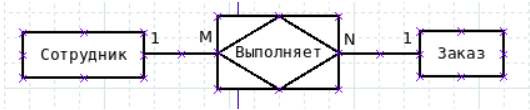

Один сотрудник может выполнять несколько заказов, и наоборот – один заказ может выполняться несколькими сотрудниками. Решение проблемы также отражено на этом рисунке, мы создали промежуточную таблицу (ассоциативное отношение) и забыли о многозначной зависимости.

**Таблица приведена к четвертой нормальной форме, если она соответствует 3NF и в ней отсутствуют многозначные зависимости (многие ко многим).**

Для обычного разработчика БД пятая нормальная форма представляет скорее теоретический, нежели практический интерес. 5NF требует обеспечения беспрепятственной возможности перестройки данных в нормализованных таблицах. 

Приведение таблицы к высшей степени нормализации – крайне редкий случай. Это действие имеет смысл, только если таблица содержит так называемые **зависимые сочетания**.

**Зависимые сочетания** – это свойство декомпозиции, которое вызывает генерацию ложных строк при обратном соединении декомпозированных отношений с помощью операции естественного соединения.

Предположим, что в базе данных существует некое отношение, хранящее данные о поставщике, товаре (полученном
от этого поставщика) и производителе, изготовившем товар
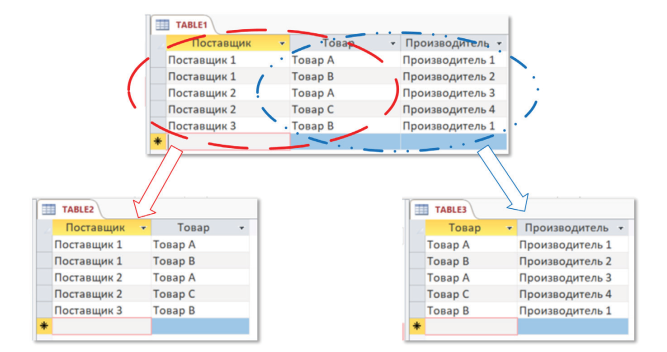

Вполне вероятно, что в процессе работы с базой данных на основе исходной таблицы нам придется построить два запроса:

1) первый запрос вернул данные о поставщиках и товарах (мы его сохранили в виде таблицы TABLE2);
2) на базе второго запроса мы получили информацию о товарах и производителях (таблица TABLE3).

А теперь попробуем решить обратную задачу – восстановим исходную таблицу TABLE1 на основе данных из TABLE2 и TABLE3.

После соединения двух таблиц мы получим четыре ложные (не существующие в реальной таблице) строки:

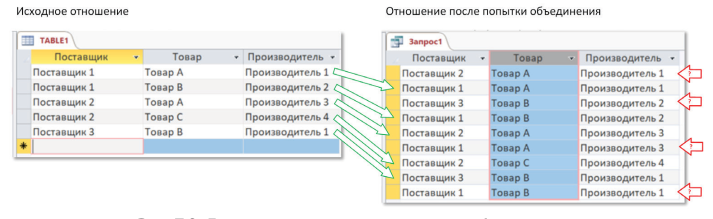

Нормальные формы вводились исследователями на протяжении 1970-х годов с целью устранить выявленные ими аномалии данных. И ввод каждой очередной НФ устранял определенную группу аномалий, но буквально сразу находилась новая подлежащая устранению аномалия. Даже казалось, что «гонка» нормальных форм будет продолжаться вечно, однако этот процесс пришел к логическому финалу в 1981 году.

В 1981 г. Р. Фагин (R. Fagin) в своей статье ввел понятие доменно-ключевой нормальной формы (domain/key normal form, DK/NF) и доказал, что любое отношение, приведенное к DK/NF, окажется свободным от всех возможных аномалий модификации. 

Таким образом Фагин указал на то, что введение нормальных форм более высокого порядка (с точки зрения борьбы с аномалиями модификации) не имеет смысла.

**Отношение находится в доменно-ключевой нормальной форме, если каждое ограничение, накладываемое на это отношение, является логическим следствием определения доменов и ключей.**

Таким образом, в состояние DK/NF отношение может перейти на любой ступени нормализации, например после 2NF. И в дальнейшей нормализации больше не нуждаться.

Пока не известен ни один алгоритм преобразования отношения к доменно-ключевой нормальной форме, так что создание отношений в DK/NF является более искусством, чем наукой.

## Пример даталогического проектирования